In [ ]:
import json

In [2]:
import requests

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
#get URL
r = requests.get("https://covid19.th-stat.com/api/open/cases")

In [7]:
data = r.json()

In [8]:
data.keys()

dict_keys(['Data', 'LastData', 'UpdateDate', 'Source', 'DevBy', 'SeverBy'])

In [9]:
data['Data'][0]

{'ConfirmDate': '2020-09-01 00:00:00',
 'No': '3417',
 'Age': 15,
 'Gender': 'หญิง',
 'GenderEn': 'Female',
 'Nation': 'France',
 'NationEn': None,
 'Province': 'กรุงเทพมหานคร',
 'ProvinceId': 1,
 'District': 'บางรัก',
 'ProvinceEn': 'Bangkok',
 'Detail': None,
 'StatQuarantine': 0}

In [10]:
#conver json to DF
df = pd.DataFrame(data['Data'])
df.head()

,ConfirmDate,No,Age,Gender,GenderEn,Nation,NationEn,Province,ProvinceId,District,ProvinceEn,Detail,StatQuarantine
0,2020-09-01 00:00:00,3417,15.0,หญิง,Female,France,None,กรุงเทพมหานคร,1,บางรัก,Bangkok,None,0
1,2020-09-01 00:00:00,3416,3.0,ชาย,Male,France,None,กรุงเทพมหานคร,1,บางรัก,Bangkok,None,0
2,2020-09-01 00:00:00,3415,37.0,หญิง,Female,Philippines,None,กรุงเทพมหานคร,1,พระนคร,Bangkok,None,0
3,2020-09-01 00:00:00,3414,28.0,หญิง,Female,Philippines,None,กรุงเทพมหานคร,1,พระนคร,Bangkok,None,0
4,2020-09-01 00:00:00,3413,26.0,หญิง,Female,Philippines,None,กรุงเทพมหานคร,1,พระนคร,Bangkok,None,0


In [11]:
#check data type
df.dtypes

ConfirmDate        object
No                 object
Age               float64
Gender             object
GenderEn           object
Nation             object
NationEn           object
Province           object
ProvinceId          int64
District           object
ProvinceEn         object
Detail             object
StatQuarantine      int64
dtype: object

In [12]:
#check shape
df.shape

(3418, 13)

In [13]:
#Check missing value
df.isnull().sum()

ConfirmDate          0
No                   1
Age                  0
Gender               0
GenderEn             0
Nation               0
NationEn          3342
Province             0
ProvinceId           0
District             0
ProvinceEn           0
Detail            3418
StatQuarantine       0
dtype: int64

In [14]:
#Row to drop
df[df.No.isnull()]

,ConfirmDate,No,Age,Gender,GenderEn,Nation,NationEn,Province,ProvinceId,District,ProvinceEn,Detail,StatQuarantine
451,2020-04-04 00:00:00,None,51.0,ชาย,Male,สหราชอาณาจักร,British,กรุงเทพมหานคร,1,,Bangkok,None,0


In [15]:
#Drop row
df.dropna(subset=['No'],inplace=True)

In [16]:
df['ConfirmDate'] = df['ConfirmDate'].str.split(expand=True)
df
print(df.ConfirmDate)

0       2020-09-01
1       2020-09-01
2       2020-09-01
3       2020-09-01
4       2020-09-01
           ...    
3413    2020-01-24
3414    2020-01-22
3415    2020-01-22
3416    2020-01-17
3417    2020-01-12
Name: ConfirmDate, Length: 3417, dtype: object


In [17]:
#Replace values Thai(unkown) with 'Unknown'
df['Nation'].replace('ไม่ทราบ', 'Unknown', inplace=True)
df['NationEn'].replace('Unknown', np.NaN, inplace=True)

In [18]:
df.isnull().sum()

ConfirmDate          0
No                   0
Age                  0
Gender               0
GenderEn             0
Nation               0
NationEn          3351
Province             0
ProvinceId           0
District             0
ProvinceEn           0
Detail            3417
StatQuarantine       0
dtype: int64

In [19]:
df.Nation.unique()

array(['France', 'Philippines', 'UnitedKingdom', 'Thailand',
       'UnitedStatesofAmerica', 'Ethiopia', 'India', 'Qatar',
       'Bangladesh', 'Russia', 'Serbia', 'Finland', 'Egypt', 'Sudan',
       'China', 'Italy', 'Germany', 'Burma', 'ต่างด้าว', 'Vietnam',
       'Malaysia', 'Yemen', 'Cambodia', 'Mali', 'Unknown', 'Laos',
       'Australia', 'Palestine', 'Singapore', 'Kazakhstan', 'Israel',
       'Brazil', 'Japan', 'Albania', 'Netherlands', 'Sweden', 'Mexico',
       'Tunisia', 'Belgium', 'Kuwait', 'Liberia', 'Hungary',
       'Switzerland', 'Pakistan', 'Canada', 'Korea,South', 'Taiwan',
       'Indonesia', 'India-Thailand', 'spain', 'Uzbekistan', 'Portugal',
       'Ukraine', 'Denmark', 'NewZealand', 'Iran'], dtype=object)

In [20]:
df['Nation'].replace('ต่างด้าว','Foreigner', inplace=True)
df.Nation.unique()

array(['France', 'Philippines', 'UnitedKingdom', 'Thailand',
       'UnitedStatesofAmerica', 'Ethiopia', 'India', 'Qatar',
       'Bangladesh', 'Russia', 'Serbia', 'Finland', 'Egypt', 'Sudan',
       'China', 'Italy', 'Germany', 'Burma', 'Foreigner', 'Vietnam',
       'Malaysia', 'Yemen', 'Cambodia', 'Mali', 'Unknown', 'Laos',
       'Australia', 'Palestine', 'Singapore', 'Kazakhstan', 'Israel',
       'Brazil', 'Japan', 'Albania', 'Netherlands', 'Sweden', 'Mexico',
       'Tunisia', 'Belgium', 'Kuwait', 'Liberia', 'Hungary',
       'Switzerland', 'Pakistan', 'Canada', 'Korea,South', 'Taiwan',
       'Indonesia', 'India-Thailand', 'spain', 'Uzbekistan', 'Portugal',
       'Ukraine', 'Denmark', 'NewZealand', 'Iran'], dtype=object)

In [21]:
#Columns to drop (NationEn, Detail)
df = df.drop(['NationEn', 'District', 'Detail'], axis=1)

In [22]:
AgeStat = df['Age'].describe()
AgeStat

count    3417.000000
mean       38.114516
std        15.504880
min         0.000000
25%        26.000000
50%        36.000000
75%        48.000000
max        97.000000
Name: Age, dtype: float64

In [23]:
df[df['Age'] == 0]

,ConfirmDate,No,Age,Gender,GenderEn,Nation,Province,ProvinceId,ProvinceEn,StatQuarantine
417,2020-05-08,3000,0.0,หญิง,Female,Burma,สงขลา,58,Songkhla,1
542,2020-04-25,2876,0.0,หญิง,Female,Burma,สงขลา,58,Songkhla,1
852,2020-04-13,2567,0.0,ชาย,Male,Thailand,กรุงเทพมหานคร,1,Bangkok,0
853,2020-04-13,2566,0.0,หญิง,Female,Thailand,กรุงเทพมหานคร,1,Bangkok,0
854,2020-04-13,2565,0.0,หญิง,Female,Thailand,กรุงเทพมหานคร,1,Bangkok,0
978,2020-04-10,2439,0.0,หญิง,Female,Thailand,กรุงเทพมหานคร,1,Bangkok,0
1318,2020-04-05,2084,0.0,ชาย,Male,Thailand,สมุทรปราการ,60,Samut Prakan,0
1319,2020-04-05,2083,0.0,หญิง,Female,Thailand,สมุทรปราการ,60,Samut Prakan,0
1321,2020-04-05,2081,0.0,ชาย,Male,Thailand,สมุทรปราการ,60,Samut Prakan,0
1624,2020-04-01,1769,0.0,หญิง,Female,Thailand,สมุทรสาคร,62,Samut Sakhon,0


In [24]:
Mean_age = df['Age'].mean()
Mean_age

38.11451565700907

In [35]:
#Fill age=0 with mean because age cannot be 0

df['Age'] = df['Age'].replace(0, Mean_age)
df['Age'] = df['Age'].replace(0.0, Mean_age)

In [36]:
df['Age'].describe()

count    3417.000000
mean       38.316155
std        15.270293
min         0.100000
25%        27.000000
50%        36.000000
75%        48.000000
max        97.000000
Name: Age, dtype: float64

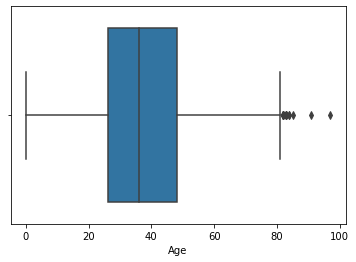

In [27]:
#!pip install seaborn
import seaborn as sb
BP = sb.boxplot(x=df['Age'])

In [28]:
df.corr()

,Age,ProvinceId,StatQuarantine
Age,1.000000,-0.005396,-0.121244
ProvinceId,-0.005396,1.000000,0.113725
StatQuarantine,-0.121244,0.113725,1.000000
